Full disclaimer,,,
 
I ripped tf outta this MIT lecture [here](https://ocw.mit.edu/courses/15-071-the-analytics-edge-spring-2017/pages/linear-regression/moneyball-the-power-of-sports-analytics/) where they did it in R.  

But I made it cooler and better. 

# ISBE 
* I - Inspect
* S - Select
* B - Build
* E - Evaluate 

In [1]:
# PANDAS IS FOR DATA WRANGLING
import pandas as pd
import numpy as np

# SEABORN IS A PLOTTING LIBRARY
import seaborn as sns

# MATPLOT LIB IS ALSO A PLOTTING LIBRARY
import matplotlib.pyplot as plt

# SKLEARN IS OUR MACHINE LEARNING PACKAGE
from sklearn.linear_model import LinearRegression

# IMPORT OUR RANDOM FOREST REGERSSOR
from sklearn.ensemble import RandomForestRegressor

# METRICS HELP US SCORE OUR MODEL
from sklearn import metrics

# HELP US SPLIT OUR DATA INTO TESTING A TRAINING
from sklearn.model_selection import train_test_split

# Good ol statsmodels
import statsmodels.api as sm

# Specific root mean squared error for stats models
from statsmodels.tools.eval_measures import rmse
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.api import qqplot

In [2]:
# BASEBALL DATA PIPELINE

def load_baseball_data(from_year=2002):
    df = pd.read_csv('data/baseball.csv')

    # Moneyball happened in 2002. 
    # So lets travel back there and remove all data after then. 
    if from_year:
        c1 = df['Year'] < from_year 
        df = df[c1]
        df = df.reset_index(drop=True)

    # calculates the Runs Scored - Runs Allowed as runs_diff
    df['runs_diff'] = df['RS'] - df['RA']
    df['RD'] = df['RS'] - df['RA']
    
    # Return the data.
    return(df)


df = load_baseball_data()
df.head()

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG,runs_diff,RD
0,ANA,AL,2001,691,730,75,0.327,0.405,0.261,0,NaN,NaN,162,0.331,0.412,-39,-39
1,ARI,NL,2001,818,677,92,0.341,0.442,0.267,1,5.0,1.0,162,0.311,0.404,141,141
2,ATL,NL,2001,729,643,88,0.324,0.412,0.260,1,7.0,3.0,162,0.314,0.384,86,86
3,BAL,AL,2001,687,829,63,0.319,0.380,0.248,0,NaN,NaN,162,0.337,0.439,-142,-142
4,BOS,AL,2001,772,745,82,0.334,0.439,0.266,0,NaN,NaN,161,0.329,0.393,27,27


#### Data Dictionary
```
* Team: Name of Team
* League: Name of League
* Year: Year of Season
* RS: Runs Scored
* RA: Runs Allowed
* W: Number of Wins
* OBP: On Base Percentage
* SLG: Slugging Percentage
* BA: Batting Average
* Playoffs: Did the team make playoffs.  1==yes
* RankSeason: idk
* RankPlayoffs: idk
* G: Number or games played
* OOBP: Opponent On Base Percentage 
* OSLG: Opponent Slugging Percentage
* runs_diff: Runs Scored - Runs Allowed
```

In [3]:
print('\n', '#'*79)
###############################################################################
print('CHECKING SHAPE AND SIZE:  df.shape', df.shape)
print('\n', '#'*79)

###############################################################################
print( "CHEKCING NULLS", "print(df.isnull().sum())")
print(df.isnull().sum())
print('\n', '#'*79)

###############################################################################
print("CHECKING DUPES, df.duplicated().sum()")
print(df.duplicated().sum())    



 ###############################################################################
CHECKING SHAPE AND SIZE:  df.shape (902, 17)

 ###############################################################################
CHEKCING NULLS print(df.isnull().sum())
Team              0
League            0
Year              0
RS                0
RA                0
W                 0
OBP               0
SLG               0
BA                0
Playoffs          0
RankSeason      748
RankPlayoffs    748
G                 0
OOBP            812
OSLG            812
runs_diff         0
RD                0
dtype: int64

 ###############################################################################
CHECKING DUPES, df.duplicated().sum()
0


In [4]:
# all_numeric_vars = list(df.select_dtypes(include='number').columns)
# print(all_numeric_vars)

# dependent_variable = 'W'
# for col in all_numeric_vars:
#     try:
#         sns.jointplot(x=col, y=dependent_variable, data=df, kind="reg");
#     except:
#         print('Could not plot variable %s' % col)

#     #sns.relplot(data = df, x=col, y=target, height=5, aspect=1)

# Making the playoffs

### The Oakland A's, Paul DePodesta, estimated how many games it would take to make the playoffs:   _95 Wins_
---
So homeboy Peter something, gut feeling predicted you need to win 95 games to make the playoffs.  Lets inspect this hypothesis

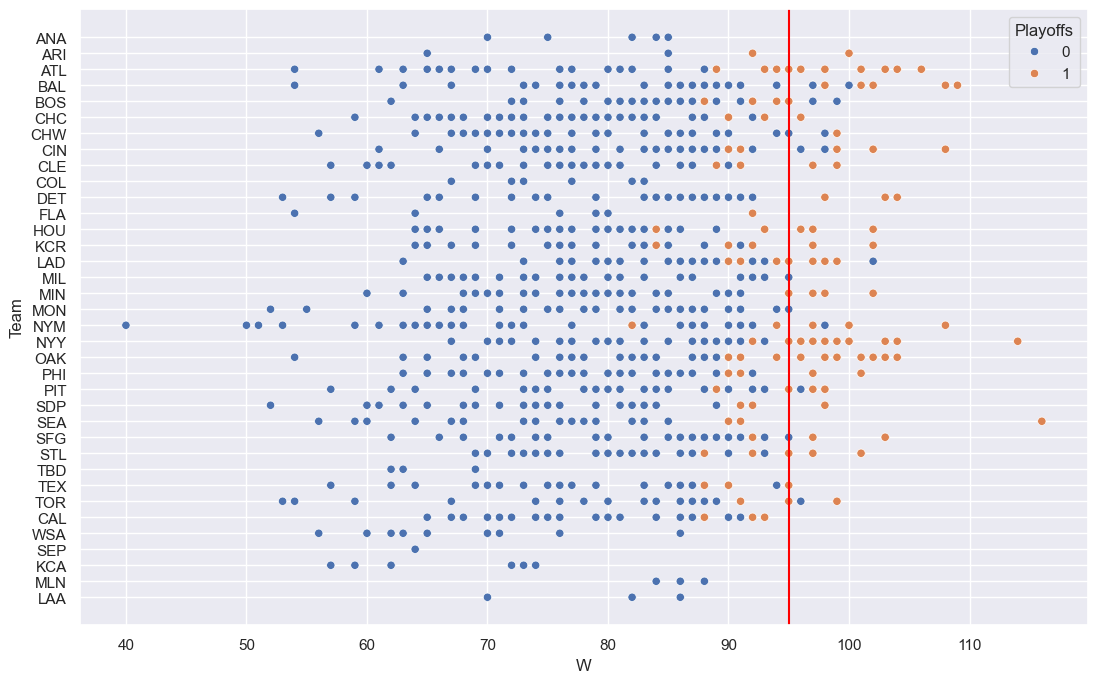

In [5]:
sns.set()
plt.figure(figsize=(13, 8))
ax = sns.scatterplot(df, x='W', y='Team', hue='Playoffs')
ax.axvline(x=95, color='red')


# HOW DO YOU WIN ANY BASEBALL, FOOTBALL, FOOTBALL, HOCKEY, BASKETBALL GAME?

### Score more than is scored on you.

<Axes: xlabel='RD', ylabel='W'>

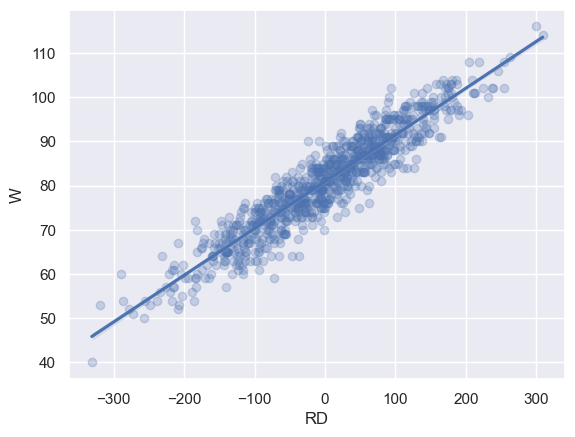

In [6]:
# Createa metric that measures the overall runs difference.
df['RD'] = df['RS'] - df['RA']
sns.regplot(df, x='RD', y='W', scatter_kws={'alpha': 0.25})


# Using RunsDiff [RD] to predict Wins [W].

In [7]:
import statsmodels.api as sm
independent_variables = 'RD'
dependent_variable = 'W'

X = df[independent_variables]
y = df[dependent_variable]

X = sm.add_constant(X)

model_wins = sm.OLS(y, X).fit()
y_pred = model_wins.predict(X) 

results = model_wins.summary()
print(results)

model_wins_root_mean_squared_error = rmse(y, y_pred)
print('#'*79)
print( 'Dependent Variable %s average: ' % dependent_variable, y.mean())
print( 'RMSE:', model_wins_root_mean_squared_error)

                            OLS Regression Results                            
Dep. Variable:                      W   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     6651.
Date:                Fri, 18 Oct 2024   Prob (F-statistic):               0.00
Time:                        13:27:39   Log-Likelihood:                -2515.5
No. Observations:                 902   AIC:                             5035.
Df Residuals:                     900   BIC:                             5045.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         80.8814      0.131    616.675      0.0

# We are going to do a lot of regression models. So lets put it into a resuable function.

In [8]:
def eval_regression(input_df, independent_variables, dependent_variable):
    data = input_df.copy()

    # Define the independent and dependent variables
    X = data[independent_variables]  # Independent variable
    y = data[dependent_variable]  # Dependent variable


    # Add a constant to the independent variables (required by statsmodels)
    X = sm.add_constant(X)

    # Split the data into training and test sets (80% train, 20% test)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Build the linear regression model
    model = sm.OLS(y_train, X_train).fit()

    y_pred = model.predict(X_test)

    # Calculate R^2
    r_squared = metrics.r2_score(y_test, y_pred).round(2)

    # Calculate RMSE
    model_root_mean_squared_error = rmse(y_test, y_pred).round(3)

    print('R-Squared Score:', r_squared)
    print('RMSE:', model_root_mean_squared_error)
    
    return None

In [9]:
def do_moneyball(input_df, independent_variables=['RD'], dependent_variable='W'):

    # Copy the data
    data = input_df.copy()

    # Define the independent and dependent variables
    X = data[independent_variables]  # Independent variable
    y = data[dependent_variable]  # Dependent variable

    # Add a constant to the independent variables (required by statsmodels)
    X = sm.add_constant(X)

    # Build the linear regression model
    model = sm.OLS(y, X).fit()
    
    # Make predictions
    y_pred = model.predict(X) 

    # Calculate R^2
    r_squared = metrics.r2_score(y, y_pred).round(2)

    # Calculate RMSE
    model_root_mean_squared_error = rmse(y, y_pred).round(3)

    # Print the summary of the model
    print(model.summary())

    # Print model description
    print('\n'*2)
    print("#"*79)
    print("Predicting:", dependent_variable)
    print("Using:",  independent_variables)
    print("#"*79)

    # Print eval metrics
    print('#'*79)
    print('R-Squared Score:', r_squared)
    print('RMSE:', model_root_mean_squared_error)
    print('Dependent Variable %s average: ' % dependent_variable, y.mean().round(3))
    print('#'*79)

    print('*'*79)
    print('EVAL ON TESTING DATA')
    print(eval_regression(input_df, independent_variables, dependent_variable))
    print('*'*79)
    # Return model
    return(model)



selected_features = ['RD']
target_feature = 'W'

model = do_moneyball(df, 
                     independent_variables=selected_features, 
                     dependent_variable=target_feature)

                            OLS Regression Results                            
Dep. Variable:                      W   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     6651.
Date:                Fri, 18 Oct 2024   Prob (F-statistic):               0.00
Time:                        13:27:39   Log-Likelihood:                -2515.5
No. Observations:                 902   AIC:                             5035.
Df Residuals:                     900   BIC:                             5045.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         80.8814      0.131    616.675      0.0

* Average Wins:  80.88 
* RMSE:  3.93 
* % off average by: %4.86


---

## Their gut was they needed to win 95 games to make the playoffs.  

### Lets use Linear Regression to find how many RD (runs difference) the need to win 95 games...
##### Below we will show a way to use Logit to know they need 95 wins make the playoffs.  

## Finding out how many runs diff we need to make 95 wins

In [10]:
coef_y_int = model.params['const']
coef_runs_diff = model.params['RD']

print(coef_y_int, coef_runs_diff)

WINS = 95

# When is runs_diff make WINS >= 95
# coef_y_int + coef_runs_diff*??? >= 95
min_runs_diff = (WINS - coef_y_int) / coef_runs_diff
min_runs_diff.round(1)


80.88137472283812 0.10576562244931811


133.5

In [11]:
### THIS IS SAME AS ABOVE

## y = m*x + b
## x = y-b / m

y_intercept = 80.88
m_coefficient = 0.1058
# x = ???

y = 95
x_target = (y - y_intercept) / m_coefficient
x_target


133.45935727788284

# They calculated they needed to score 133.5 more runs than they allow to win 95 games.  


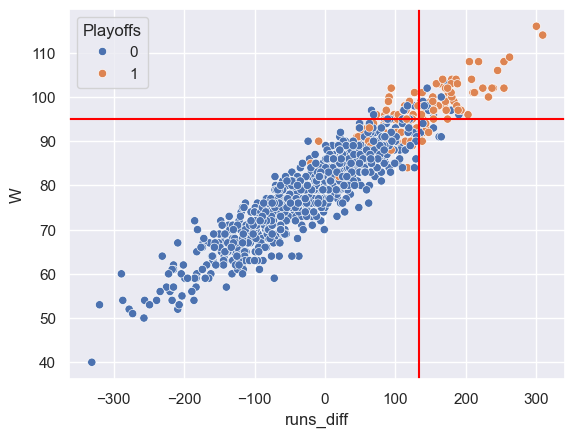

In [12]:
# ax = sns.regplot(df, x='runs_diff', y='W', hue='Playoffs')
ax = sns.scatterplot(df, x='runs_diff', y='W', hue='Playoffs')
ax.axvline(x=min_runs_diff, color='red')
ax.axhline(y=WINS, color='red')

# We need to score 133.5 more runs than we allow to win 95 games to make the playoffs.  
### Okay.... now what?

---

# How do we find which variable increases RD (runs diff) the most.

Everyone (in baseball) used to focus on Batting Average (BA) as the most important thing (or feature) when it came to winning.  

The Oakland A's thought different.  They used machine learning to find which were things (or features) acutally the most important when it came to winning. 


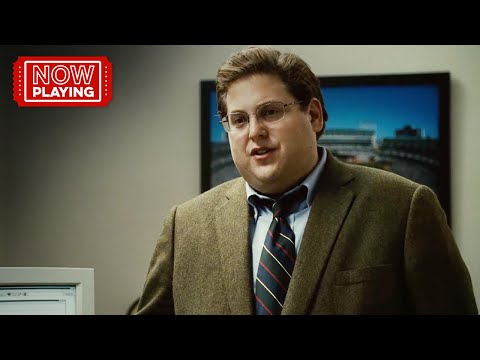

In [13]:
from IPython.display import YouTubeVideo
YouTubeVideo('unGSY5l76YQ', 800,500)
# https://www.youtube.com/watch?v=Tzin1DgexlE&t=185s&ab_channel=RPGeek

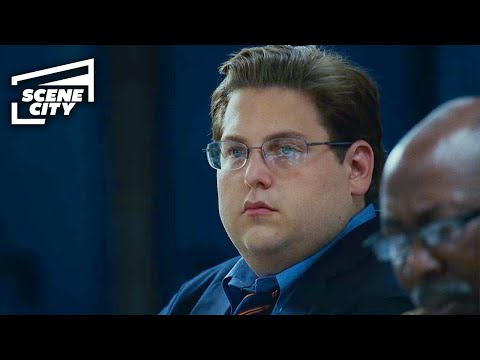

In [14]:
from IPython.display import YouTubeVideo
YouTubeVideo('3MjxoaynCmk', 800,500)

# Find which varibles are linearly related to runs scored `RS`

So now, `RS` is our `y` dependent variable.  We want to find which variables are linearlly related to it.  We can do that visually. 

In [15]:
# all_numeric_vars = list(df.select_dtypes(include='number').columns)
# print(all_numeric_vars)
# plt.figure(figsize = (3,3))

# dependent_variable = 'RS'
# for col in all_numeric_vars:
#     try:        
#         sns.jointplot(x=col, y=dependent_variable, data=df, kind="reg");
#     except:
#         print('Could not plot variable %s' % col)

#     #sns.relplot(data = df, x=col, y=target, height=5, aspect=1)

# Lets just use all of them! Make the best model ever!!!
### Whats wacky about this model?


In [16]:
X_vars = ['Year', 'RA', 'W', 'OBP', 'SLG', 'BA', 'Playoffs', 'G', 'RD']
y_var = "RS"

do_moneyball(df, X_vars, y_var)

                            OLS Regression Results                            
Dep. Variable:                     RS   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 8.950e+28
Date:                Fri, 18 Oct 2024   Prob (F-statistic):               0.00
Time:                        13:27:43   Log-Likelihood:                 22622.
No. Observations:                 902   AIC:                        -4.522e+04
Df Residuals:                     892   BIC:                        -4.518e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.183e-12   3.31e-11      0.096      0.9

# Lets do JUST the offensive metrics at once. 
## Why does this look strange?

In [17]:
X_vars = ['BA', 'OBP', 'SLG']
y_var = 'RS'
do_moneyball(df, X_vars, y_var)

print(df[X_vars].corr().round(2))

                            OLS Regression Results                            
Dep. Variable:                     RS   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     3989.
Date:                Fri, 18 Oct 2024   Prob (F-statistic):               0.00
Time:                        13:27:44   Log-Likelihood:                -4170.2
No. Observations:                 902   AIC:                             8348.
Df Residuals:                     898   BIC:                             8368.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -788.4570     19.697    -40.029      0.0

# Predicting RS using BA

In [18]:
X_vars = ['BA']
y_var = 'RS'

do_moneyball(df, X_vars, y_var)

                            OLS Regression Results                            
Dep. Variable:                     RS   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     2018.
Date:                Fri, 18 Oct 2024   Prob (F-statistic):          4.04e-232
Time:                        13:27:44   Log-Likelihood:                -4840.3
No. Observations:                 902   AIC:                             9685.
Df Residuals:                     900   BIC:                             9694.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -806.3540     33.659    -23.956      0.0

# Predicting RS using OBP

In [19]:
X_vars = ['OBP']
y_var = 'RS'

do_moneyball(df, X_vars, y_var)

                            OLS Regression Results                            
Dep. Variable:                     RS   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     4069.
Date:                Fri, 18 Oct 2024   Prob (F-statistic):               0.00
Time:                        13:27:44   Log-Likelihood:                -4600.3
No. Observations:                 902   AIC:                             9205.
Df Residuals:                     900   BIC:                             9214.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1079.0244     27.982    -38.562      0.0

### How to Interpret this the Coefficient
Let’s say the OBP coefficient is 5486. This coefficient represents the change in runs scored for every 1.0 unit increase in OBP (which is unrealistic). Instead, let’s rescale it to reflect a 0.010 increase—the kind of change you would actually see in OBP across a season.
```
5486 × 0.01 = 54.86
```

#### Interpretation for OBP:
For every 0.010 increase in OBP (e.g., from 0.300 to 0.310), the model predicts that the team will score about 55 additional runs over the season.

*assisted by gpt*

In [20]:
# df[X_vars].hist()

# Predicting RS using SLG

In [21]:
X_vars = ['SLG']
y_var = 'RS'

do_moneyball(df, X_vars, y_var)

                            OLS Regression Results                            
Dep. Variable:                     RS   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     5446.
Date:                Fri, 18 Oct 2024   Prob (F-statistic):               0.00
Time:                        13:27:44   Log-Likelihood:                -4489.9
No. Observations:                 902   AIC:                             8984.
Df Residuals:                     900   BIC:                             8993.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -315.5117     13.861    -22.762      0.0

array([[<Axes: title={'center': 'OBP'}>, <Axes: title={'center': 'SLG'}>],
       [<Axes: title={'center': 'BA'}>, <Axes: >]], dtype=object)

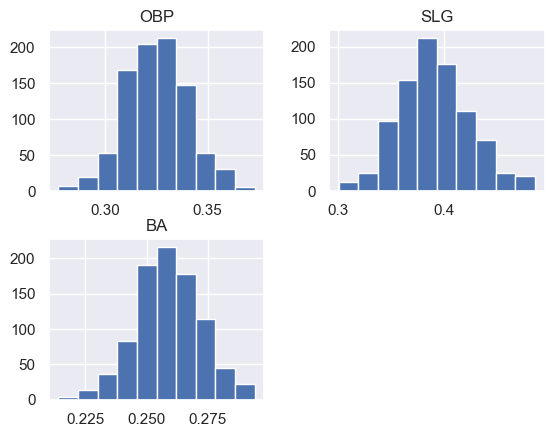

In [22]:
df[['OBP', 'SLG', 'BA']].hist()

---

# How did they know 95 wins would get them into the playoffs?

Optimization terminated successfully.
         Current function value: 0.201536
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:               Playoffs   No. Observations:                  902
Model:                          Logit   Df Residuals:                      900
Method:                           MLE   Df Model:                            1
Date:                Fri, 18 Oct 2024   Pseudo R-squ.:                  0.5590
Time:                        13:27:47   Log-Likelihood:                -181.79
converged:                       True   LL-Null:                       -412.25
Covariance Type:            nonrobust   LLR p-value:                3.005e-102
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -32.1718      2.638    -12.196      0.000     -37.342     -27.002
W              0.3461      0.

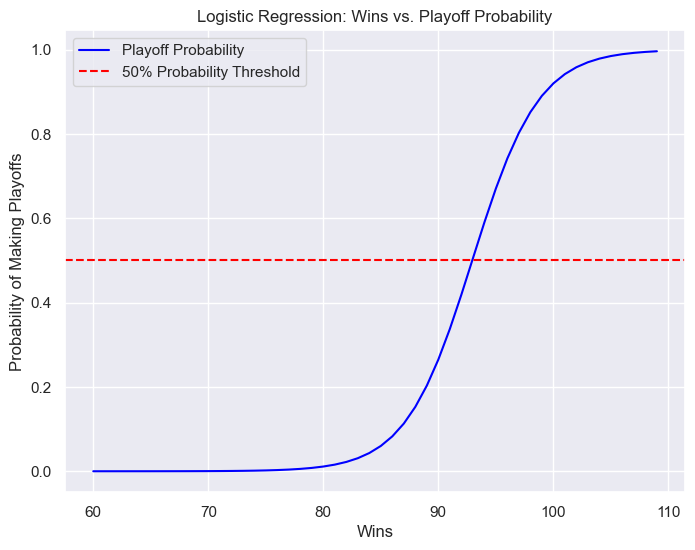

,const,W,Playoff_Probability
30,1.0,90,0.264932
31,1.0,91,0.337521
32,1.0,92,0.418670
33,1.0,93,0.504473
34,1.0,94,0.590012
35,1.0,95,0.670433
36,1.0,96,0.741977
37,1.0,97,0.802564
38,1.0,98,0.851766
39,1.0,99,0.890382


In [23]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

data = df.copy()

# Define the independent (Wins) and dependent (Playoff status) variables
X = sm.add_constant(data[['W']])  # Add constant for intercept
y = data['Playoffs']  # Playoff status

# Fit the logistic regression model
logit_model = sm.Logit(y, X).fit()

# Display the summary of the logistic regression model
print(logit_model.summary())

# Predict the probability of making the playoffs for a range of wins
wins_range = pd.DataFrame({'W': range(60, 110)})  # Wins from 60 to 109
wins_range = sm.add_constant(wins_range)  # Add constant

# Generate playoff probabilities using the logistic regression model
wins_range['Playoff_Probability'] = logit_model.predict(wins_range)

# Plot the playoff probability curve
plt.figure(figsize=(8, 6))
plt.plot(wins_range['W'], wins_range['Playoff_Probability'], color='blue', label='Playoff Probability')
plt.axhline(0.5, color='red', linestyle='--', label='50% Probability Threshold')
plt.xlabel('Wins')
plt.ylabel('Probability of Making Playoffs')
plt.title('Logistic Regression: Wins vs. Playoff Probability')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

wins_range.iloc[30:40]

---
# Okay, lets see what affects RUNS ALLOWED the most.

In [24]:
df.isnull().sum()

Team              0
League            0
Year              0
RS                0
RA                0
W                 0
OBP               0
SLG               0
BA                0
Playoffs          0
RankSeason      748
RankPlayoffs    748
G                 0
OOBP            812
OSLG            812
runs_diff         0
RD                0
dtype: int64

# Whats the error here?

In [25]:
# Make a copy of the 
independent_variables = ['OOBP', 'OSLG']
dependent_variable = 'RA'
do_moneyball(df, independent_variables, dependent_variable)

MissingDataError: exog contains inf or nans

In [ ]:
# There are nans in the OOBP and OSLG columns. 
# Make a copy of the dataframe and remove nans

df_defense = df[['OOBP', 'OSLG', 'RA']].copy()
df_defense = df_defense.dropna()

independent_variables = ['OOBP', 'OSLG']
dependent_variable = 'RA'
do_moneyball(df_defense, independent_variables, dependent_variable)

--- 
NICE TO COVER IF WE HAVE TIME.  
# Checking Assumptons
1. Linearity
2. Homoscedasticity
3. Normality of Errors
4. Multicollinearity
5. Outliers

# Lets do this for the runs scored model first. 

In [ ]:
independent_variables = ['OBP', 'SLG']
dependent_variable = 'RS'

X = df[independent_variables]
y = df[dependent_variable]

X = sm.add_constant(X)

model_runs_scored = sm.OLS(y, X).fit()
#predictions = mode_runs_scored.predict(X) 
print(model_runs_scored.summary())

## Checking Linearity

In [ ]:
for col in independent_variables:
    sns.jointplot(x=col, y=dependent_variable, data=df, kind="reg");

# Checking Homoscedasticy


In [ ]:
## Code taken / modified via tutorial below
# https://www.einblick.ai/python-code-examples/residual-plots-heteroskedasticity-test/

plt.scatter(model_runs_scored.fittedvalues, model_runs_scored.resid, alpha=0.5)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.axhline(y = 0, color = 'r')
plt.show()


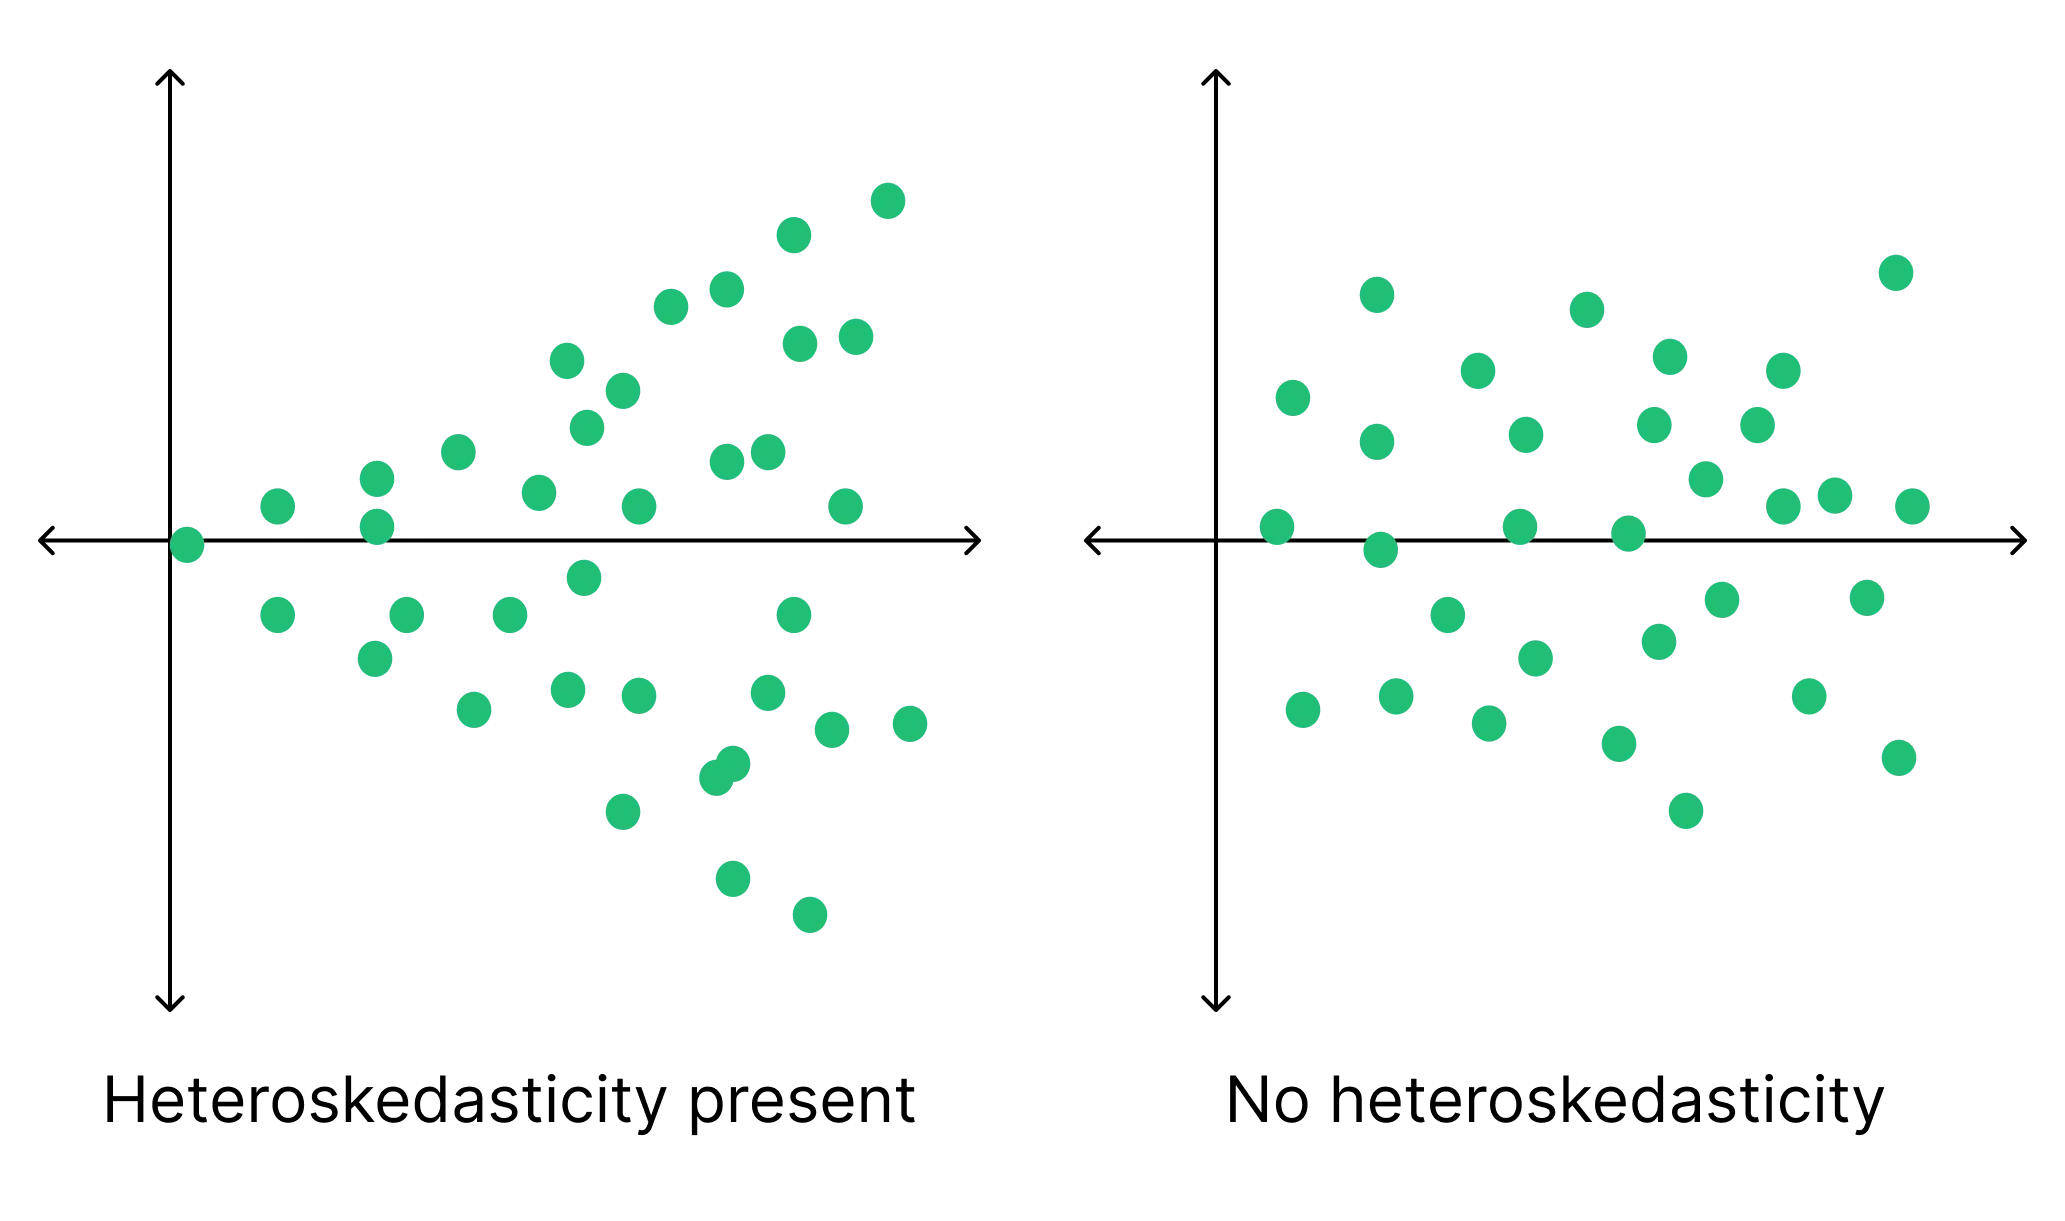

### Normal distribution of the error aka the resiudals

In [ ]:
from statsmodels.api import qqplot


print('#'*79)
print('Checking Normality')
# predictions
y_pred = model_runs_scored.predict(X)

# the truth - the prediction
residuals =  y.values - y_pred.values 

# histogram
sns.histplot(residuals)
plt.show()


# qq plot
qqplot(residuals, line='q');
plt.show()
print('#'*79)





# Checking for Multicollinearity 

### Member this summary report and why i asked if it looked strange?


In [ ]:
independent_variables = ['OBP', 'SLG', 'BA']
dependent_variable = 'RS'

X = df[independent_variables]

y = df[dependent_variable]

X = sm.add_constant(X)

model_runs_scored = sm.OLS(y, X).fit()
print(model_runs_scored.summary())

# This looks strange because batting average shouldn't be NEGATIVELY affecting Runs scored... 
## Why is this happening.  

<div>
<img src=https://i.imgflip.com/80a3lx.jpg width="500">
</div>

# Checking mulitcollinearity

In [ ]:
plt.figure(figsize = (3,3))

ax = sns.heatmap( df[independent_variables].corr(numeric_only=True), 
            annot=True, 
            cmap='coolwarm',
            vmin=-1, vmax=1);
plt.show()

In [ ]:
# https://towardsdatascience.com/verifying-the-assumptions-of-linear-regression-in-python-and-r-f4cd2907d4c0
from statsmodels.stats.outliers_influence import variance_inflation_factor


vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_df = pd.DataFrame(columns=X.columns, data=[vif])
print('#'*79)
print('Variance Inflaction Factors')
print(vif_df)
print('#'*79)


# Below is code I also wrote in the `CTPLIB.py` file

In [60]:
%matplotlib inline


def check_linearity(df, independent_variables, dependent_variable):
    for col in independent_variables:
        sns.jointplot(x=col, y=dependent_variable, data=df, kind="reg");


##########################################################################
def check_normality(model, X, y):
    print('#'*79)
    print('Checking Normality')
    # predictions
    y_pred = model.predict(X)

    # the truth - the prediction
    residuals =  y.values - y_pred.values 

    # histogram
    sns.histplot(residuals)
    plt.show()


    # qq plot
    qqplot(residuals, line='q');
    plt.show()
    print('#'*79)

    

##########################################################################
def plot_homo(model):
    plt.scatter(model_runs_scored.fittedvalues, model_runs_scored.resid, alpha=0.5)
    plt.xlabel('Fitted Values')
    plt.ylabel('Residuals')
    plt.axhline(y = 0, color = 'r')
    plt.show()


##########################################################################    
def plot_correlation(df, independent_variables):
    plt.figure(figsize = (3,3))

    ax = sns.heatmap( df[independent_variables].corr(numeric_only=True), 
                annot=True, 
                cmap='coolwarm',
                vmin=-1, vmax=1);
    plt.show()
    

##########################################################################
def get_vif(X):
    vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif_df = pd.DataFrame(columns=X.columns, data=[vif])
    print('#'*79)
    print('Variance Inflaction Factors')
    print(vif_df)
    print('#'*79)
    return vif_df



##########################################################################
def build_and_validate_LR(df, independent_variables, dependent_variable):
    X = df[independent_variables]

    y = df[dependent_variable]

    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    
    print(model.summary())
    
    check_linearity(df, independent_variables, dependent_variable)
    
    plot_correlation(df, independent_variables)
    
    vif_df = get_vif(X)
    
    check_normality(model, X, y)

# Do This Instead:

### Introducting the CTP-LIBRARY

In [ ]:
import CTPLIB as ctp

ivs = ['OBP', 'SLG']
dv = 'RS'

ctp_model = ctp.CTP_LinReg(df=df, independent_variables=ivs, dependent_variable=dv)
ctp_model.run_all()



# SKIP BELOW
### Using SK-Learn for LR and making predictions. 
* Here are just extras we dont need to cover but you can dig into if you want.

In [ ]:
# Predicting Runs Scored
df = load_baseball_data()

## Runs Scored
X = df[['OBP', 'SLG']]
y = df['RS']
print(y.mean()) 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
lr_runs_scored = LinearRegression()

lr_runs_scored.fit(X_train, y_train)

y_pred = lr_runs_scored.predict(X_test)

r_squared = metrics.r2_score(y_test, y_pred)

print('R-Squared Score:', r_squared)

metrics.mean_squared_error(y_test, y_pred, squared=False)



In [ ]:
# Predicting Runs Allowed
df = load_baseball_data()

df_defense = df[['OOBP', 'OSLG', 'RA']].copy()
print(df_defense.isnull().sum())
df_defense = df_defense.dropna()
print(df_defense.shape)

X = df_defense[['OOBP', 'OSLG']]
y = df_defense['RA']
print(y.mean())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

lr_runs_allowed = LinearRegression()

lr_runs_allowed.fit(X_train, y_train)

y_pred = lr_runs_allowed.predict(X_test)

r_squared = metrics.r2_score(y_test, y_pred)
print('R-Squared Score:', r_squared)

metrics.mean_squared_error(y_test, y_pred, squared=False)